In [23]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import linregress
from glob import glob

In [3]:
# Kristina's code starts here

In [4]:
# Kristina's code ends here

In [5]:
# Jeff's code starts here
filenames = glob('Resources/StormEvent*.csv')
Storm_Event_df = [pd.read_csv(f, dtype = str) for f in filenames]



In [6]:
Storm_Event_Combined_df=pd.DataFrame()

for i in range(0,len(Storm_Event_df)):
    Storm_Event_Combined_df = Storm_Event_Combined_df.append(Storm_Event_df[i])
#Storm_Event_df

Storm_Event_Combined_df.head()



,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40,...,0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48,...,0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42,...,0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42,...,0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42,...,0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB


In [7]:
#jeff's code ends here


In [8]:
# Faduma's code starts here
filenames = glob('Temperature_Data/Temperature_Data*.csv')
Temp_Data_df = [pd.read_csv(f, dtype = str) for f in filenames]

Temp_Data_Combined_df=pd.DataFrame()

for i in range(0,len(Temp_Data_df)):
    Temp_Data_Combined_df = Temp_Data_Combined_df.append(Temp_Data_df[i])
    
#combined file name:
Temp_Data_Combined_df.head()

,STATION,NAME,DATE,CDSD,DSND,DSNW,EMNT,EMSD,EMSN,EMXP,...,TAVG,TMAX,TMIN,WDMV,AWND,TSUN,WDF2,WDF5,WSF2,WSF5
0,USC00210018,"ADA, MN US",1950-01,NaN,NaN,NaN,-33,NaN,NaN,0.50,...,NaN,NaN,-16.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00210018,"ADA, MN US",1950-02,NaN,NaN,1,-32,NaN,1.0,0.10,...,7.1,19.1,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00210018,"ADA, MN US",1950-03,NaN,NaN,0,-25,NaN,0.3,0.91,...,19.5,29.5,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00210018,"ADA, MN US",1950-04,NaN,NaN,NaN,5,NaN,NaN,NaN,...,32.8,41.0,24.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00210018,"ADA, MN US",1950-05,NaN,0,0,30,0,0.0,1.40,...,51.8,61.6,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Faduma's code ends here

In [10]:
# Emily's code starts here
# View existing dataframe
Storm_Event_Combined_df.head(150)



,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40,...,0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48,...,0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42,...,0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42,...,0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42,...,0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,195007,22,1507,195007,22,1507,NaN,9991325,COLORADO,8,...,0,NaN,NaN,40.52,-104.57,NaN,NaN,NaN,NaN,PUB
146,195007,3,1820,195007,3,1820,NaN,10004028,INDIANA,18,...,0,NaN,NaN,41.65,-86.30,NaN,NaN,NaN,NaN,PUB
147,195008,5,1730,195008,5,1730,NaN,9991326,COLORADO,8,...,0,NaN,NaN,40.73,-102.55,40.72,-102.52,NaN,NaN,PUB
148,195008,5,1735,195008,5,1735,NaN,9991327,COLORADO,8,...,0,NaN,NaN,40.70,-102.50,40.68,-102.47,NaN,NaN,PUB


In [11]:
list(Storm_Event_Combined_df.columns)

['BEGIN_YEARMONTH',
 'BEGIN_DAY',
 'BEGIN_TIME',
 'END_YEARMONTH',
 'END_DAY',
 'END_TIME',
 'EPISODE_ID',
 'EVENT_ID',
 'STATE',
 'STATE_FIPS',
 'YEAR',
 'MONTH_NAME',
 'EVENT_TYPE',
 'CZ_TYPE',
 'CZ_FIPS',
 'CZ_NAME',
 'WFO',
 'BEGIN_DATE_TIME',
 'CZ_TIMEZONE',
 'END_DATE_TIME',
 'INJURIES_DIRECT',
 'INJURIES_INDIRECT',
 'DEATHS_DIRECT',
 'DEATHS_INDIRECT',
 'DAMAGE_PROPERTY',
 'DAMAGE_CROPS',
 'SOURCE',
 'MAGNITUDE',
 'MAGNITUDE_TYPE',
 'FLOOD_CAUSE',
 'CATEGORY',
 'TOR_F_SCALE',
 'TOR_LENGTH',
 'TOR_WIDTH',
 'TOR_OTHER_WFO',
 'TOR_OTHER_CZ_STATE',
 'TOR_OTHER_CZ_FIPS',
 'TOR_OTHER_CZ_NAME',
 'BEGIN_RANGE',
 'BEGIN_AZIMUTH',
 'BEGIN_LOCATION',
 'END_RANGE',
 'END_AZIMUTH',
 'END_LOCATION',
 'BEGIN_LAT',
 'BEGIN_LON',
 'END_LAT',
 'END_LON',
 'EPISODE_NARRATIVE',
 'EVENT_NARRATIVE',
 'DATA_SOURCE']

In [12]:
# keeping only the columns that are relevant
clean_storm_data_df = Storm_Event_Combined_df[['YEAR','MONTH_NAME','BEGIN_DAY','STATE','EVENT_TYPE']]

# filtering the data based on weather in Minnesota
clean_storm_data_mn_df = clean_storm_data_df[clean_storm_data_df['STATE'] == 'MINNESOTA']
clean_storm_data_mn_df.head()

# rename the columns
clean_storm_data_mn_df = clean_storm_data_mn_df.rename(columns={
    "YEAR": "Year",
    "MONTH_NAME": "Month",
    "BEGIN_DAY": "Day",
    "STATE": "State",
    "EVENT_TYPE": "Event Type",
})

# check number of rows and columns
clean_storm_data_mn_df.shape

# view all unique event types
clean_storm_data_mn_df['Event Type'].unique()

# # Check the number of rows in the data
# len(clean_storm_data_mn_df)

#need to check for Nan values and drop them
#update 'THUNDERSTORM WINDS/HEAVY RAIN' to proper case
#check each column for consistency

array(['Tornado', 'Thunderstorm Wind', 'Hail',
       'THUNDERSTORM WINDS/HEAVY RAIN', 'Blizzard', 'Cold/Wind Chill',
       'Heavy Snow', 'Ice Storm', 'High Wind', 'Flash Flood', 'Flood',
       'Winter Weather', 'Debris Flow', 'Lightning', 'Funnel Cloud',
       'Heavy Rain', 'Winter Storm', 'Strong Wind', 'Waterspout', 'Heat',
       'Drought', 'Dense Fog', 'Wildfire', 'Frost/Freeze',
       'Extreme Cold/Wind Chill', 'Lake-Effect Snow', 'Lakeshore Flood',
       'Excessive Heat', 'Rip Current', 'Freezing Fog', 'Sleet',
       'Coastal Flood'], dtype=object)

## Testing of cleaned storm data - should be moved to analysis routine


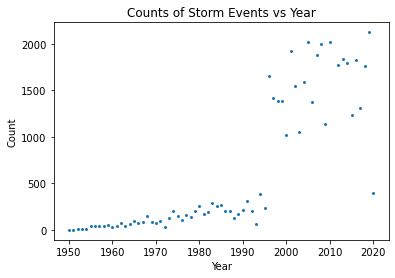

In [13]:
#testing by Jeff
year_list = clean_storm_data_mn_df["Year"].unique()
event_list = clean_storm_data_mn_df["Event Type"].unique()

#clean_storm_data_mn_df
year_count_df = pd.DataFrame()
for i in year_list:
    year_count = clean_storm_data_mn_df[clean_storm_data_mn_df["Year"]==i]["Event Type"].count()
    year_count_df = year_count_df.append({"Year":i, "Count":year_count}, ignore_index=True)
year_count_df

x_data = (year_count_df["Year"].astype(int))
y_data = year_count_df["Count"].astype(float)

plt.scatter(x_data,y_data, s = 4)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Counts of Storm Events vs Year")

plt.show()

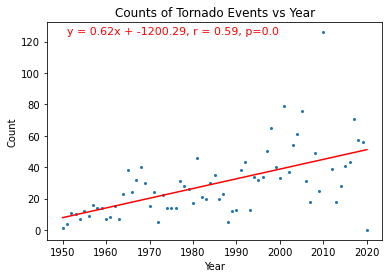

In [43]:
#testing by Jeff
#Isolating just the Tornado data (data set from 1950-2020)

year_list = clean_storm_data_mn_df["Year"].unique()
event_list = clean_storm_data_mn_df["Event Type"].unique()
clean_tornado_mn_df = pd.DataFrame()
clean_tornado_mn_df = clean_storm_data_mn_df[clean_storm_data_mn_df["Event Type"]=="Tornado"]

#clean_storm_data_mn_df
year_count_df = pd.DataFrame()
for i in year_list:
    year_count = clean_tornado_mn_df[clean_tornado_mn_df["Year"]==i]["Event Type"].count()
    year_count_df = year_count_df.append({"Year":i, "Count":year_count}, ignore_index=True)
year_count_df

x_data = (year_count_df["Year"].astype(int))
y_data = year_count_df["Count"].astype(float)

plt.scatter(x_data,y_data, s = 4)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Counts of Tornado Events vs Year")

(slope_N, intercept_N, rvalue_N, pvalue_N, stderr_N) = linregress(x_data,y_data)
regress_values_N = x_data * slope_N + intercept_N
line_eq = "y = " + str(round(slope_N,2)) + "x + " + str(round(intercept_N,2))+", r = " +str(round(rvalue_N,2))+", p="+str(round(pvalue_N,2))
min_x = x_data.min()
max_y = y_data.max()
plt.plot(x_data,regress_values_N,"r-")
plt.annotate(line_eq,(min_x+1,max_y-1),fontsize=11,color="red") #writes to coordinates on graph
plt.show()

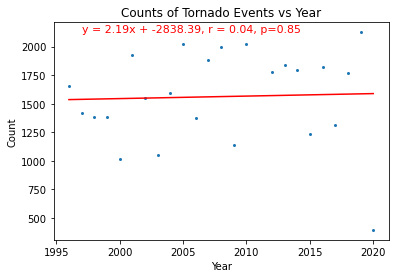

In [33]:
#testing by Jeff
year_list = clean_storm_data_mn_df["Year"].unique()
event_list = clean_storm_data_mn_df["Event Type"].unique()
clean_tornado_mn_df = pd.DataFrame()
clean_tornado_mn_df = clean_storm_data_mn_df[clean_storm_data_mn_df["Year"]>"1995"]

#clean_storm_data_mn_df looking beyond 1995 only
count_g1995_df = pd.DataFrame()
for i in year_list:
    if i > "1995":
        count_g1995 = clean_tornado_mn_df[clean_tornado_mn_df["Year"]==i]["Event Type"].count()
        count_g1995_df = count_g1995_df.append({"Year":i, "Count":count_g1995}, ignore_index=True)


x_data = (count_g1995_df["Year"].astype(int))
y_data = count_g1995_df["Count"].astype(float)

plt.scatter(x_data,y_data, s = 4)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Counts of All Events vs Year past 1995")

(slope_N, intercept_N, rvalue_N, pvalue_N, stderr_N) = linregress(x_data,y_data)
regress_values_N = x_data * slope_N + intercept_N
line_eq = "y = " + str(round(slope_N,2)) + "x + " + str(round(intercept_N,2))+", r = " +str(round(rvalue_N,2))+", p="+str(round(pvalue_N,2))
min_x = x_data.min()
max_y = y_data.max()
plt.plot(x_data,regress_values_N,"r-")
plt.annotate(line_eq,(min_x+1,max_y-1),fontsize=11,color="red") #writes to coordinates on graph
plt.show()

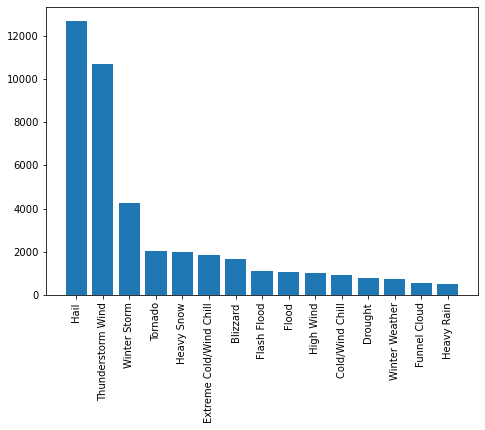

,Count,Event Type,Percent
2,12678.0,Hail,29.235559
1,10671.0,Thunderstorm Wind,24.607402
16,4274.0,Winter Storm,9.855875
0,2048.0,Tornado,4.722703
6,2014.0,Heavy Snow,4.644298
24,1878.0,Extreme Cold/Wind Chill,4.330681
4,1667.0,Blizzard,3.844114
9,1110.0,Flash Flood,2.559668
10,1082.0,Flood,2.495100
8,1028.0,High Wind,2.370575


In [38]:
#more code by Jeff
event_count_df = pd.DataFrame()
for i in event_list:
    event_count = clean_storm_data_mn_df[clean_storm_data_mn_df["Event Type"]==i]["Event Type"].count()
    event_count_df = event_count_df.append({"Event Type":i, "Count":event_count}, ignore_index=True)
event_count_df = event_count_df.sort_values(by = "Count", ascending = False)


total = event_count_df["Count"].sum()
event_count_df["Percent"] = event_count_df["Count"]/total*100
event_count_ge1_df = pd.DataFrame()
event_count_ge1_df = event_count_df[event_count_df["Percent"]>=1]

x_data = event_count_ge1_df["Event Type"].astype(object)
y_data = event_count_ge1_df["Count"].astype(float)
x_list = x_data.tolist()
y_list = y_data.tolist()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(x_list,y_list)
plt.show()

event_count_df

In [ ]:
# Emily's code ends here